# <center> Solar panel detection via deep learning


<center> <img src = "https://miro.medium.com/v2/resize:fit:1358/1*2Uxt7Uv2jXZQShOkAIrH4A.png" width = 55%>

## Contents Of This Notebook
**1)** [Introducing the Problem](#h1)      
**2)** [Understanding the Dataset](#h2)    
**3)** [Importing necessary libraries and modules for this notebook](#h3)      
**4)** [Exploratory Analysis & Data Scaling](#h4)           
**5)** [Building & Tuning our CNN Model](#h5)   
**6)** [Model Evaluation & Results](#h6)        
**7)** [Testing on various images](#h7)

**8)** [Overlay of predicted output](#h8)

#Introduction to the Issue<a name ="h1"></a>

###Why is it important to identify solar panels??

<p align="justify">

At present, only 1% of the world's electricity supply is derived from solar energy. However, projections for solar energy generation suggest a potential 65-fold increase in output by 2050, positioning solar energy as a major global energy source. Approximately 30% of this energy is expected to be generated by rooftop solar photovoltaic (PV) power systems. Solar PV power has already been playing a growing role in electricity generation in the United States, with production increasing by a remarkable 39-fold or 75,123 GWh between 2008 and 2017

<p align="justify">Here's an overview on the global growth -

<center> <img src = "https://elements.visualcapitalist.com/wp-content/uploads/2021/11/solar-power-by-country-new.jpg" width = 75%>

<p align="justify">Granular data on distributed rooftop solar PV is becoming increasingly important as solar photovoltaic (PV) becomes a significant segment of the energy industry. An imagery-based solar panel recognition algorithm that can be used to create detailed databases of installations and their power capacity would be extremely helpful to solar power suppliers and consumers, urban planners, grid system operators, and energy policy makers. The fact that solar panel installers typically keep installation details to themselves is another factor in solar panel detection. A well-known solar panel detecting technique or algorithm is therefore urgently needed. However, there hasn't been much effort done to identify solar panels in aerial or satellite photographs.

<p align="justify">We first require a labelled data-set of satellite images in order to create an algorithm that can recognise solar panels from aerial or satellite imagery.


# Understanding the Dataset<a name ="h2"></a>

##### <center> <b>Here are a few snippets from the dataset - Images containing Solar Panels </b>

<center> <img src = "https://anna-berman.com/images/solarPV-PV.png" width = 75%>

##### <center> <b>Here are a few snippets from the dataset - Images NOT containing Solar Panels</b>
<center> <img src = "https://anna-berman.com/images/solarPV-PVno.png" width = 75%>


<p align="justify">When examining the photographs themselves, it is clear that solar panels frequently have rectangular shapes with distinct angles and borders. However, the whole pictures that include solar PV do not necessarily have a same structure. The solar panels are not always at the centre of images, which come in a range of sizes and hues. Additionally, the background scenery in the photographs of the two classes is also not uniform. Both classes contain illustrations of home swimming pools, pavement, grass, and rooftops. A model should also be able to predict the same class independent of the orientation of each image.

#Importing necessary libraries and modules for this notebook<a name ="h3"></a>

***Importing Required Libraries and Functions***

This code snippet imports various Python libraries and functions for data handling, visualization, data analysis, and model building. It also sets the `square_size` variable to 101 for later use in the code.

***- Data Handling & Linear Algebra:***
  - `numpy` (as `np`): Library for numerical operations and array manipulation.
  - `pandas` (as `pd`): Library for data manipulation and analysis.

***- Visualization:***
  - `matplotlib.pyplot` (as `plt`): Library for creating visualizations and     
    plots.
  - `matplotlib` (as `mpl`): Matplotlib configurations.
  - `pylab` (from `pylab import rcParams`): Customizations for Matplotlib plots.
  - `seaborn` (as `sns`): Library for statistical data visualization.

***Data Analysis:***
  - `sklearn.model_selection`: Module for model selection and evaluation.
  - `sklearn.metrics`: Module for evaluating model performance.

***Manipulating Data and Model Building:***
  - `keras.layers.Conv2D`: Layer for 2D convolution in Keras.
  - `keras.layers.Dense`: Layer for fully connected (dense) neural network.
  - `keras.layers.GlobalMaxPooling2D`: Layer for global max pooling in Keras.
  - `keras.layers.MaxPooling2D`: Layer for 2D max pooling in Keras.
  - `keras.layers.BatchNormalization`: Layer for batch normalization in Keras.
  - `keras.layers.Add`: Layer for element-wise addition in Keras.
  - `keras.models.Sequential`: Sequential model for building neural networks.
  - `os`: Operating system interface for interacting with the file system.

- ***`square_size`***: Variable defining the size of squares used in the analysis (set to 101).

By importing these libraries and functions, the code sets up the environment for subsequent data analysis and model building tasks.



In [ ]:
# IMPORT REQUIRED LIBRARIES AND FUNCTIONS


'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns

'''Data Analysis'''
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

'''Manipulating Data and Model Building'''

from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GlobalMaxPooling2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Add
from keras.models import Sequential
import os

square_size=101

## ***DATASET USED FOR THE DEEP LEARNING MODEL***

- Download <a href="https://drive.google.com/drive/folders/1Pe887pD6DP0nsqq0G1BdoMNExDvBoSp9?usp=sharing" target="_blank">this dataset</a> to your system.
- Upload this 'data' folder directly in your 'Main Drive'.

# ***Code Documentation: Mounting Google Drive and Defining Dataset Directories***

This code snippet mounts Google Drive in a Google Colab environment and defines the dataset directories for later use in the code.

- `from google.colab import drive`: Import the `drive` module from the `google.colab` library.

- `drive.mount('/content/drive')`: Mount Google Drive to the '/content/drive' directory in the Colab environment.

***- Define Dataset Directories:***
  - `DIR_TRAIN_IMAGES`: Directory path for training images.
  - `DIR_TRAIN_LABELS`: File path for training labels (CSV format).
  - `DIR_TEST_IMAGES`: Directory path for testing images.

**Note:** The provided directory paths are specific to Google Colab and the use of Google Drive. Ensure that you have placed the 'data' folder in your Google Drive's 'My Drive' for the links to work correctly.

This code snippet sets up the data directories, allowing easy access to training and testing data during the analysis and model-building phases.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# define dataset directories - the below links won't work if you haven't placed 'data' folder in your 'Main Drive'
DIR_TRAIN_IMAGES = "/content/drive/MyDrive/data/training/"
DIR_TRAIN_LABELS = "/content/drive/MyDrive/data/labels_training.csv"
DIR_TEST_IMAGES = "/content/drive/MyDrive/data/testing/"

#Exploratory Analysis & Data Scaling<a name ="h4"></a>




In [ ]:
pd.read_csv(DIR_TRAIN_LABELS).head()

- id are names of the image before tif
- label has two values:
  - 0: No solar panels in the image
  - 1: Solar panels present in the image

## ***Loading Data and Preprocessing***

This code snippet defines functions for loading training and test data from directories and preprocesses the images for later use in machine learning models.

**- `load_data(dir_data, dir_labels)`:**
  - ***Parameters***:
    - `dir_data`: Data directory containing image files.
    - `dir_labels`: CSV file path containing image IDs and labels.
  - ***Returns***:
    - `data`: Array of image arrays (numpy arrays).
    - `labels`: Array of corresponding labels.
  - ***Description***:
    - Reads the CSV file containing image IDs and labels.
    - Extracts image IDs.
    - Iterates through the image IDs, reads each image file as a numpy array using Matplotlib, and appends it to the `data` list.
    - Converts the `data` list into a numpy array.
    - Extracts labels from the CSV file.
    - Returns the array of image data and corresponding labels.

**- `load_test_data(dir_test_data)`:**
  - ***Parameters***:
    - `dir_test_data`: Data directory containing test image files.
  - ***Returns***:
    - `test_data`: Array of test image arrays (numpy arrays).
  -*** Description***:
    - Iterates through the files in the test data directory.
    - Reads each test image file as a numpy array using Matplotlib and appends it to the `test_data` list.
    - Converts the `test_data` list into a numpy array.
    - Returns the array of test image data.

- ***Load Train Data:***
  - Loads training data by calling `load_data` with the training data directory and labels CSV file path.
  - Assigns the loaded data to `X` (training images) and `y` (training labels).

- ***Load Test Data***:
  - Loads test data by calling `load_test_data` with the test data directory.
  - Assigns the loaded test data to `X_test`.

**Note: Loading training data can be time-consuming, especially if the dataset is large**.

This code snippet provides functions for loading and preprocessing image data, making it ready for further analysis and model building.


In [ ]:
# LOADING DATA AND PREPROCESSING

from PIL import Image
import pandas as pd
import numpy as np

def load_data(dir_data, dir_labels):
    '''
    dir_data: Data directory
    dir_labels: Respective csv file containing ids and labels
    returns: Array of all the image arrays and its respective labels
    '''
    labels_pd = pd.read_csv(dir_labels)                         # Read the csv file with labels and ids as we saw above
    ids = labels_pd.id.values                                   # Extracting ids from the csv file
    data = []                                                   # Initiating the empty list to store each image as numpy array
    for identifier in ids:                                      # Looping into the desired folder
        fname = dir_data + identifier.astype(str)                # Generating the file name without extension
        try:
            image = Image.open(fname + '.tif')                   # Try to open as JPEG
        except FileNotFoundError:
            image = Image.open(fname + '.jpg')                   # If not found, try to open as TIFF
        image_array = np.array(image)                           # Convert PIL Image to numpy array
        data.append(image_array)                                # Appending this array into the empty list and repeat the above cycle
    data = np.array(data)                                       # Now, convert the data list into data array
    labels = labels_pd.label.values                             # Extract labels from the csv file
    return data, labels


In [ ]:
def load_test_data(dir_test_data):
    test_data = []
    for filename in os.listdir(dir_test_data):
        fname = os.path.join(dir_test_data, filename)
        image = mpl.image.imread(fname)
        test_data.append(image)
    test_data = np.array(test_data)
    return test_data

In [ ]:
# load train data - time consuming code cell
X, y = load_data(DIR_TRAIN_IMAGES, DIR_TRAIN_LABELS)

In [ ]:
X_test = load_test_data(DIR_TEST_IMAGES)

## ***Display Images with and Without Solar Panels***

This code snippet visualizes a set of images from the dataset, displaying them along with labels that indicate the presence or absence of solar panels.

- `plt.figure(figsize=(13, 8))`:
  - Sets the size of the figure to (13, 8) inches for better visualization.

- Loop through the first 6 images in the dataset:
  - `for i in range(6):`
  - `plt.subplot(2, 3, i + 1)`: Create a subplot with 2 rows and 3 columns and select the i-th subplot.

  - `plt.imshow(X[i])`: Display the i-th image from the dataset using Matplotlib.

  - Determine the title based on the label (y) of the image:
    - If `y[i]` is 0 (indicating no solar panels), set the title as 'No Solar Panels in this image.'
    - If `y[i]` is 1 (indicating solar panels present), set the title as 'Solar Panels in this image.'

  - `plt.title(title, color='r', weight='bold')`: Add the title to the current subplot with red color and bold font.

- `plt.tight_layout()`: Automatically adjusts the width and height between images in the subplot for better layout.

- `plt.show()`: Display the subplots with images and titles.

- Print the shape of the data (X) using `print('X shape:\n', X.shape)`.

- Calculate and print the distribution of labels (y) using `print('Distribution of y', np.bincount(y))`.

This code snippet provides a visual representation of the dataset, allowing developers to inspect images and their corresponding labels, helping in data exploration and understanding.


In [ ]:
# display the images with and without solar panels
plt.figure(figsize = (13,8))                         # Adjust the figure size
for i in range(6):                                   # For first 6 images in the data
  plt.subplot(2, 3, i+1)                             # Create subplots
  plt.imshow(X[i])                                   # Show the respective image in respective postion
  if y[i] == 0:                                      # If label is 0
    title = 'No Solar Panels in this image'          # Set this as the title
  else:                                              # Else label is 1
    title = 'Solar Panels in this image'             # Set this as the title
  plt.title(title, color = 'r', weight = 'bold')     # Adding title to each images in the subplot
plt.tight_layout()                                   # Automatically adjusts the width and height between images in subplot
plt.show()                                           # Display the subplot

In [ ]:
# print data shape
print('X shape:\n', X.shape)

- 1500 total images in the training data
- Each image is of shape (101 x 101 x 3)

In [ ]:
# check number of samples
print('Distribution of y', np.bincount(y))

- Out of 1500 images:
  - 995 images are without any solar panels
  - 505 images are with solar panels

***Scaling Pixel Values between 0 and 1***

This code snippet performs data preprocessing by scaling pixel values of the images between 0 and 1. Scaling is a common step in deep learning to ensure that the input features have similar ranges, which can help in training neural networks effectively.

- `X = X / 255.0`:
  - Divides all pixel values in the image dataset (X) by 255.0.
  - 255.0 is used because it represents the maximum pixel value in the common 8-bit image format, where pixel values range from 0 to 255.
  - Dividing by 255.0 scales the pixel values to the range of [0, 1], ensuring that they are normalized and suitable for input to machine learning models.

This code snippet prepares the image data for training by standardizing the pixel values, making it ready for use in machine learning models.


In [ ]:
# scale pixel values between 0 and 1
X = X / 255.0

### ***Convolutional Neural Networks (CNNs):***

Convolutional Neural Networks (CNNs) are a class of deep learning models specifically designed for processing grid-like data, such as images and video frames. They have proven to be highly effective in various computer vision tasks, including image classification, object detection, and image segmentation.

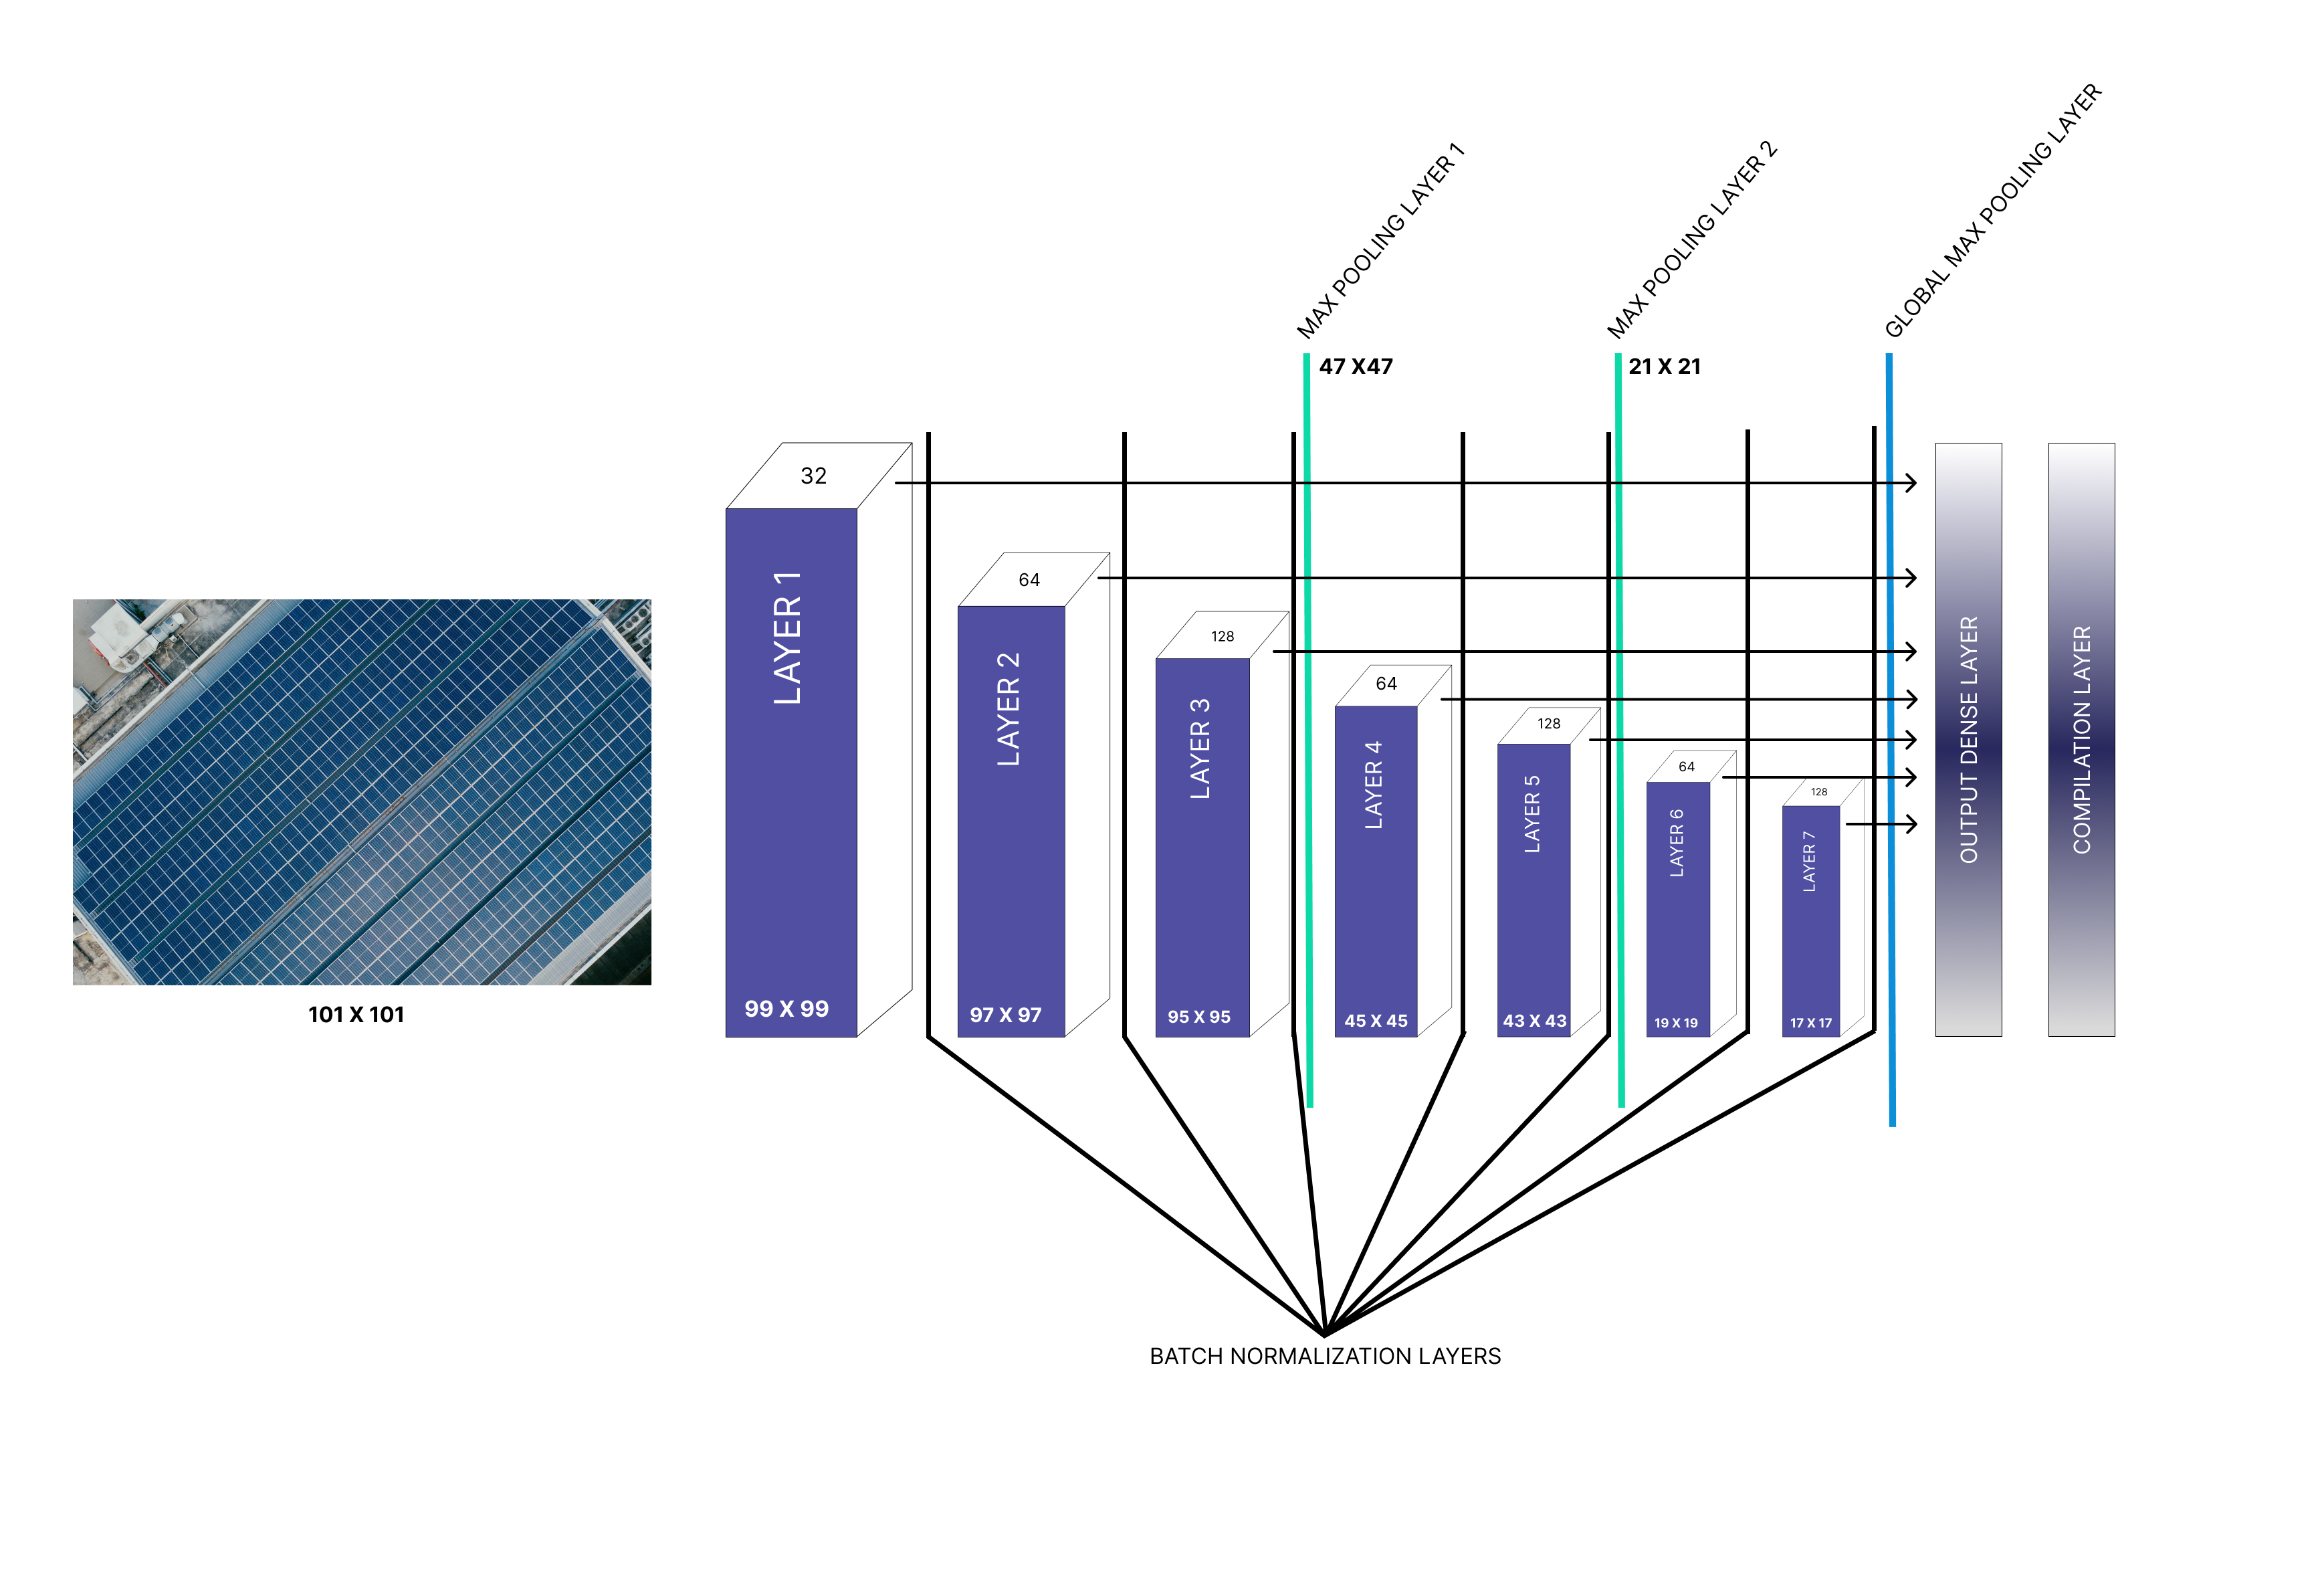

### ***Key Components of a CNN:***

1. **Convolutional Layers:**
   - Convolutional layers are the core building blocks of a CNN. They consist of a set of learnable filters (also known as kernels). These filters slide (convolve) over the input image to extract local features.
   - Each filter performs a dot product between itself and a small portion of the input image, effectively learning to detect specific patterns or features. For example, one filter might learn to detect edges, while another could detect textures.
   - The depth of the filters in a convolutional layer represents the number of features it can learn. In early layers, filters tend to capture simple features like edges, while deeper layers learn more complex features.
   - Activation functions, such as ReLU (Rectified Linear Unit), are applied to the output of each filter to introduce non-linearity into the model.

2. **Batch Normalization:**
   - Batch normalization is often applied after convolutional layers. It normalizes the activations of the previous layer, which helps in faster convergence and reduces the risk of overfitting.
   
3. **Pooling Layers:**
   - Pooling layers (e.g., Max Pooling) reduce the spatial dimensions of feature maps produced by convolutional layers. They do this by selecting the maximum (or average) value from a small region of the feature map.
   - Pooling layers help in downscaling the feature maps, reducing computational complexity, and making the network translation-invariant (able to recognize features regardless of their position in the image).

4. **Global Max-Pooling:**
   - Global max-pooling is a special type of pooling layer that computes the maximum value along the height and width dimensions of the feature map. It reduces the feature map to a single value per channel, effectively capturing the most important feature in each channel.

5. **Fully Connected Layers:**
   - After feature extraction, fully connected layers are used for making predictions. These layers connect every neuron in one layer to every neuron in the next layer.
   - The final fully connected layer often uses a sigmoid or softmax activation function, depending on the task. For binary classification, sigmoid is commonly used.

### ***Adjustments to Improve Accuracy:***

To make a CNN more accurate, several adjustments and strategies can be employed:

1. **Increase Model Depth:**
   - Adding more convolutional layers can capture increasingly complex features. However, be cautious of overfitting with very deep models.

2. **Data Augmentation:**
   - Augment the training data by applying transformations such as rotation, flipping, scaling, and cropping to increase the diversity of training examples.

3. **Dropout Regularization:**
   - Introduce dropout layers to randomly deactivate neurons during training, reducing overfitting.

4. **Learning Rate Scheduling:**
   - Use learning rate schedules to adaptively adjust the learning rate during training. This can help the model converge faster and avoid overshooting the minimum of the loss function.

5. **Different Architectures:**
   - Experiment with different CNN architectures, such as variations of VGG, ResNet, or Inception, to find the one that suits your task best.

6. **Hyperparameter Tuning:**
   - Adjust hyperparameters like batch size, kernel size, the number of filters, and layer configurations through experimentation.

7. **Transfer Learning:**
   - Consider using pre-trained CNN models (e.g., from ImageNet) as a starting point and fine-tune them on your specific task. This can save training time and improve accuracy.

8. **Ensemble Learning:**
   - Combine predictions from multiple CNN models (ensemble learning) to boost accuracy.

9. **Regularization Techniques:**
   - Explore other regularization techniques like L2 regularization (weight decay) to prevent overfitting.

10. **Optimized Hardware:**
    - Train your model on specialized hardware, such as GPUs or TPUs, to speed up training.

It's important to note that the effectiveness of these adjustments depends on the specific dataset and problem you're working on. It's often necessary to experiment with different strategies to find the best combination for your particular task.

In [ ]:
# MODEL : CONVOLUTIONAL NEURAL NETWORK

# define CNN
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.layers import Dropout

# Define a learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.001  # Initial learning rate
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # Reduce learning rate after 10 epochs

# Create an instance of the learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Create an instance of early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Adjust optimizer (e.g., Adam) and learning rate
optimizer = Adam(learning_rate=0.0001)

def build_model():
    '''
    Returns a Keras CNN model
    '''

    # define image dimensions
    IMAGE_HEIGHT = 101
    IMAGE_WIDTH = 101
    IMAGE_CHANNELS = 3

    # define a straightforward sequential neural network
    model = Sequential()

    # layer-1
    #filter is convolutional matrix which is applied across the image = 32 filters
    #kernal size is 3x3 matrix(filter)
    #relu positive kept as it is, negative is taken out
    # model.add(Conv2D(filters=32,
    #                  kernel_size=3,
    #                  activation='relu',
    #                  input_shape=(IMAGE_HEIGHT,
    #                               IMAGE_WIDTH,
    #                               IMAGE_CHANNELS)))
    model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(square_size, square_size, 3)))  # Set input_shape to (square_size, square_size, 3)

    #adding normalizing layer to improve the speed of training
    model.add(BatchNormalization())

    # As we move forword in the layers pattern gets more complex,
    # to capture the maximum combinations in subsequent layers
    # layer-2
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-3
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # Pooling layer is to reduce dimentions of feature map by summerizing presence of features
    # max-pool - sends only imp data to next layer - here 2x2 matrix
    model.add(MaxPooling2D(pool_size=2))

    # layer-4
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-5
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # max-pool
    model.add(MaxPooling2D(pool_size=2))

    # layer-6
    model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())

    # layer-7
    model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())




    # gobal-max-pool- performs downsampling by computing the maximum of the height and width dimensions of the input
    # using it as a substitute of Flatten before passing it to the final layer
    model.add(GlobalMaxPooling2D())

    # output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


# ***Convolutional Neural Network (CNN) Model Definition***

This code snippet defines a CNN model for image classification using the Keras library. CNNs are particularly effective for image-related tasks due to their ability to learn hierarchical features from images.


### Model Architecture:

1. **Importing Necessary Libraries:**
   - The code starts by importing the required libraries and functions for deep learning, including Keras components.

2. **Learning Rate Schedule:**
   - A learning rate schedule is defined using a custom function `lr_schedule(epoch)`. It dynamically adjusts the learning rate during training. Initially, the learning rate is set to 0.001, and after 10 epochs, it is reduced to 0.0001.

3. **Callbacks:**
   - Two callbacks are defined:
     - `LearningRateScheduler`: Adjusts the learning rate during training.
     - `EarlyStopping`: Monitors validation loss and stops training if the loss does not improve for 10 consecutive epochs while keeping the best model weights.

4. **Optimizer Selection:**
   - The Adam optimizer is chosen with a learning rate of 0.0001.

5. **Building the CNN Model:**
   - The `build_model()` function defines the CNN architecture.
   - Input dimensions: The input images are assumed to have dimensions (square_size, square_size, 3) where 3 represents the three color channels (RGB).
   
   - Sequential Model: The model is created as a sequential neural network, where layers are added sequentially.

   - **Convolutional Layers:**
     - The model consists of multiple convolutional layers, each followed by batch normalization for faster convergence and better generalization.
     - Example Convolutional Layer (layer-1):
       - 32 filters with a 3x3 kernel size.
       - ReLU activation function.
       - Input shape is set to (square_size, square_size, 3).
       
   - **Max Pooling Layers:**
     - Max-pooling layers with a 2x2 pool size follow some of the convolutional layers. Max-pooling reduces the dimensionality of feature maps.
     
   - **Global Max Pooling Layer:**
     - A global max-pooling layer is added to perform downsampling by taking the maximum value along the height and width dimensions of the feature map.
     
   - **Output Layer:**
     - The final layer is a dense layer with a single neuron and sigmoid activation, suitable for binary classification tasks.

6. **Model Compilation:**
   - The model is compiled using the Adam optimizer and binary cross-entropy loss (commonly used for binary classification).
   - Accuracy is chosen as the evaluation metric.

# **Model Architecture of this deep learning model   **

### Summary:

This code defines a CNN architecture for image classification. It includes convolutional layers for feature extraction, batch normalization for regularization, and global max-pooling for dimensionality reduction. The model is compiled with appropriate loss and metrics. It's a suitable template for training on image classification tasks.


##Checking the Performance of our CNN Model

# **Cross-Validating CNN Model**

The `cv_performance_assessment` function is used to perform cross-validated performance assessment for a Convolutional Neural Network (CNN) model. Cross-validation is a common technique in machine learning for assessing how well a model generalizes to unseen data. In this case, the performance of a CNN model is evaluated using k-fold cross-validation.

### Function Parameters:

- `X`: Training data, which is a numpy array containing images.
- `y`: Training labels, a numpy array with binary labels (0 or 1).
- `num_folds`: The number of folds for cross-validation.
- `clf`: The CNN classifier model to be evaluated.
- `random_seed`: Random seed for reproducibility.

### Cross-Validation Process:

1. **Learning Rate Scheduler and Early Stopping:**
   - A learning rate scheduler is defined using the `lr_schedule` function, which adjusts the learning rate during training.
   - Early stopping is implemented to monitor the validation loss and restore the best weights when the loss stops improving.

2. **Optimizer and Learning Rate:**
   - The Adam optimizer with a learning rate of 0.0001 is used.

3. **Prediction Scores Initialization:**
   - An empty array `prediction_scores` is created to store the model's prediction scores for each fold. The array has the same shape as the training labels `y`.

4. **Stratified K-Fold Cross-Validation:**
   - The training data is divided into `num_folds` folds using stratified k-fold cross-validation. Stratified k-fold ensures that each fold maintains the class distribution of the original data, which is crucial when dealing with imbalanced datasets.

5. **Training and Testing for Each Fold:**
   - For each fold:
     - The training and validation data are extracted from `X` and `y`.
     - Class weights are assigned based on the target class distribution to give more weight to the minority class. This helps to address class imbalance issues.
     - The CNN classifier is trained on the training data for a maximum of 10 epochs. Callbacks for learning rate scheduling and early stopping are applied.
     - The trained model is then used to predict the validation data.
     - The predicted probabilities of the positive class (solar panels) are stored in the `prediction_scores` array for the corresponding validation samples.

6. **Return Predictions:**
   - The function returns the `prediction_scores` array, which contains the predicted probabilities for each fold.

### Cross-Validation Considerations:

- Cross-validation helps assess the model's performance on different subsets of the data, providing a more robust estimate of its generalization ability.
- By using class weights and early stopping, the function takes steps to handle class imbalance and prevent overfitting during training.
- The predicted probabilities for each fold can be used to calculate various evaluation metrics, such as ROC-AUC or F1-score, to assess the model's performance.

To use this function, you can pass your training data `X` and labels `y`, specify the number of folds, and provide the CNN model you want to evaluate (`clf`). It will return an array of predicted probabilities, which can be further analyzed to assess the model's performance and make predictions on new data.

In [ ]:
# cross-validate CNN model
def cv_performance_assessment(X, y, num_folds, clf, random_seed=1):
    '''
    Cross validated performance assessment

    Input:
        X: training data
        y: training labels
        num_folds: number of folds for cross validation
        clf: classifier to use

    Divide the training data into k folds of training and validation data.
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are
    aggregated and output.
    '''

    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Create an instance of early stopping to monitor validation loss
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Adjust optimizer (e.g., Adam) and learning rate
    optimizer = Adam(learning_rate=0.0001)

    prediction_scores = np.empty(y.shape[0], dtype='object')

    # establish the num_folds folds
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(X, y):
        # extract the training and validation data for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]

        # give more weight to minority class based on the target class distribution
        class_weight = {0: 2734/5549, 1: 2815/5549}

        # train the classifier
        training = clf.fit(x=X_train,
                           y=y_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1,
                           callbacks=[lr_scheduler, early_stopping])

        # test the classifier on the validation data for this fold
        y_val_pred_probs = clf.predict(X_val).reshape((-1, ))

        # save the predictions for this fold
        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

# ***Number of Subsets for Cross-Validation***
In this code snippet, you specify the number of subsets (folds) into which the data will be divided for cross-validation. Cross-validation is a technique used to assess the performance of a machine learning model, and it involves splitting the data into multiple subsets for training and testing. In this case, you have chosen to use 5 subsets (folds) for cross-validation.

- `num_folds = 5`: This variable is set to 5, indicating that you want to perform 5-fold cross-validation. This means that the dataset will be divided into 5 equal-sized subsets, and the model will be trained and tested 5 times, with a different subset used as the test set in each iteration.

# ***Random Seed for Reproducibility***
The `random_seed` variable is used to set the seed value for the random number generator. Setting a random seed ensures that the random processes, such as data shuffling or weight initialization, produce the same results each time you run the code. This is important for reproducibility, as it allows you to obtain the same results when training the model again.

- `random_seed = 1`: Here, you've set the random seed to 1. This specific seed value will be used to control the random aspects of cross-validation and model training, making the results reproducible.

# ***Building the CNN Model***
The `build_model()` function is called to create an instance of a convolutional neural network (CNN) model. CNNs are a type of deep learning model commonly used for image classification tasks. You can refer to the earlier explanation for details on the layers and architecture of the CNN model.

# ***Model Summary***
The `cnn.summary()` function is used to display a summary of the CNN model's architecture. It provides information about the layers, the number of parameters in each layer, and the total number of trainable parameters in the model. This summary is helpful for understanding the model's structure and ensuring that it matches your design expectations.

# ***Cross-Validated Performance Assessment***
The `cv_performance_assessment` function is called to perform cross-validated performance assessment of the CNN model. This function was explained in a previous response. It takes as input the training data `X`, training labels `y`, the number of folds for cross-validation (`num_folds`), the CNN model (`cnn`), and the random seed for reproducibility (`random_seed`). It returns an array `cnn_y_hat_prob` containing the predicted probabilities for each fold.

By executing this code snippet, you perform 5-fold cross-validation, train the CNN model on different subsets of the data, and obtain predicted probabilities for each fold. These predicted probabilities can be used to assess the model's performance and make predictions on new data.

In [ ]:
# number of subsets of data, where k subsets are used as test set and other k-1 subsets are used for the training purpose
num_folds = 5

# seed value is the previous value number generated by the random function
random_seed = 1

# build_model() function returns the predefined sequential model
cnn = build_model()

# lets look at summary of the model
cnn.summary()

# generate the probabilities (y_pred_prob)
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)

Looking at the True Positives, False Negatives, False Positives & True Negatives -



### ***In this code snippet, you are performing the following tasks:***

1. **Reading the CSV file containing labels:**
   - `df = pd.read_csv(DIR_TRAIN_LABELS)`: This line reads the CSV file located at `DIR_TRAIN_LABELS` into a Pandas DataFrame (`df`). This CSV file presumably contains labels for the training data, including image IDs and their corresponding true labels.

2. **Adding a Column for Predicted Class:**
   - `df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]`: Here, you add a new column to the DataFrame called "predicted_class." This column is populated based on the predicted probabilities (`cnn_y_hat_prob`) generated by the CNN model. If the predicted probability is greater than or equal to 0.5, it assigns a value of 1 (indicating the presence of solar panels), otherwise, it assigns a value of 0 (indicating the absence of solar panels).

3. **Extracting Values for FN, FP, TP, TN:**
   - The code extracts image IDs for different categories based on the comparison between true labels and predicted classes. It identifies False Negatives (FN), False Positives (FP), True Positives (TP), and True Negatives (TN) based on these comparisons.

4. **Visualizing Images for TP, TN, FP, and FN:**
   - The `show_images` function is defined to visualize a subset of images based on their image IDs.
   - Four separate calls to `show_images` are made to display examples of:
     - *True Positives (TP)*: Images where solar panels were correctly predicted when they were present.
     - *False Positives (FP)*: Images where solar panels were incorrectly predicted when they were not present.
     - *True Negatives (TN)*: Images where no solar panels were correctly predicted when they were not present.
     - *False Negatives (FN)*: Images where no solar panels were incorrectly predicted when they were present.

   - The function displays a specified number of images (controlled by `num_images`) from each category and provides a title with a description and color (green for correct predictions and red for incorrect predictions).

By running this code, you can visually inspect the model's performance by examining example images in each category, helping you understand where the model is making correct or incorrect predictions. This can be valuable for model evaluation and fine-tuning.

In [ ]:
# df = pd.read_csv(DIR_TRAIN_LABELS)                                              # Create a data frame of labels
# df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]    # Add a column to it for predicted class

df = pd.read_csv(DIR_TRAIN_LABELS)  # Create a DataFrame of labels
df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]  # Add a column for predicted class

# Get the values for FN, FP, TP, TN
fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])  # False Negative
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])  # False Positive
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])  # True Positive
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id'])  # True Negative

In [ ]:
# Visuals of TP, TN, FP, and FN
def show_images(image_ids, num_images, title, color):
    '''
    Display a subset of images from the image_ids data
    '''
    rcParams['figure.figsize'] = 20, 4                                          # Adjusting figure size
    plt.figure()                                                                # Generating figure
    n = 1                                                                       # index where plot should apear in subplot
    for i in image_ids[0:num_images]:                                           # Run a loop for total number of images to display
        plt.subplot(1, num_images, n)                                           # Generate a subplot
        plt.imshow(X[i, :, :, :])                                               # Display the image
        plt.title('Image id: ' + str(i))                                        # Add title
        plt.axis('off')                                                         # Turn off the axis
        n+=1                                                                    # Incrememting index by 1
    plt.suptitle('\n'+title, fontsize=15, color = color, weight = 'bold')       # Adding main title to subplot
    plt.show()                                                                  # Display the final output

In [ ]:
num_images = 4  # number of images to look at
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')

# Model Evaluation & Results<a name ="h6"></a>

### **This code snippet, is performing the following tasks:**

**1. Defining a ROC Curve Plotting Function:**
   - `plot_roc` is a function that generates ROC curves for the CNN model's predictions. It uses the `roc_curve` and `roc_auc_score` functions from scikit-learn to calculate and plot the ROC curve. The function takes true labels (`y_true`) and predicted probabilities (`y_pred_cnn`) as inputs.

**2. Loading and Preprocessing Test Data:**
   - `X_test` is loaded using the `load_test_data` function, which reads and processes the test image data located at `DIR_TEST_IMAGES`.
   - The pixel values of the test data are scaled between 0 and 1, similar to what was done with the training data.

**3. Making Predictions on Test Data:**
   - The CNN model (`cnn`) is used to predict labels for the test data.
   - These predictions are thresholded at 0.5 to determine whether solar panels are present or not in each test image.

**4. Displaying Test Images with Predictions:**
   - A subplot is created to display the first 6 images from the test data.
   - For each test image, the predicted label is used to determine whether solar panels are present or not.
   - The image is displayed with a title indicating the prediction result ("Solar Panels in this image" or "No Solar Panels in this image").
   - The images are displayed using `plt.imshow`, and titles are added based on the prediction result.

By running this code, you can visualize the predictions made by the CNN model on the test data. This allows you to see how well the model is performing on unseen data and whether it correctly identifies the presence or absence of solar panels in the test images. The ROC curve for the CNN model's predictions can also be plotted using the `plot_roc` function to assess its overall performance.

In [ ]:
# ROC - AUC
def plot_roc(y_true, y_pred_cnn):
    '''
    Plots ROC curves for the CNN models.
    '''
    plt.figure(figsize=(8, 8))

    # ROC of CNN
    fpr, tpr, _ = roc_curve(y_true, y_pred_cnn, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    # ROC of chance
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    # plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

In [ ]:
def load_test_data(dir_test_data):
    test_data = []
    for filename in os.listdir(dir_test_data):
        fname = os.path.join(dir_test_data, filename)
        image = mpl.image.imread(fname)
        test_data.append(image)
    test_data = np.array(test_data)
    return test_data

# Load test data - modify this part
X_test = load_test_data(DIR_TEST_IMAGES)

# Scale pixel values between 0 and 1
X_test = X_test / 255.0

# Predict labels for test data using the trained CNN model
test_predictions = cnn.predict(X_test)

# Threshold the predictions (e.g., 0.5) to determine if solar panels are present or not
test_labels = [1 if pred >= 0.5 else 0 for pred in test_predictions]

# Display the images from test data along with the predictions
plt.figure(figsize=(13, 8))
for i in range(6):  # Display first 6 images
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_test[i])
    if test_labels[i] == 0:
        title = 'No Solar Panels in this image'
    else:
        title = 'Solar Panels in this image'
    plt.title(title, color='r', weight='bold')
plt.tight_layout()
plt.show()


***In this code snippet, we are performing the following tasks for a specific test image:***

1. **Making a Prediction for a Specific Image:**
   - You select a specific test image by its index (`specific_image_index`) from the test dataset.
   - The CNN model (`cnn`) is used to predict the label for this specific image by expanding its dimensions using `np.expand_dims`. The prediction result is stored in `specific_image_prediction`.

2. **Determining the Predicted Label:**
   - Based on the prediction probability (`specific_image_prediction`), you determine whether the predicted label for the specific image is "Solar Panels" or "No Solar Panels." If the prediction probability is greater than or equal to 0.5, it is classified as "Solar Panels"; otherwise, it is classified as "No Solar Panels."

3. **Displaying the Specific Image with the Predicted Label:**
   - A subplot is created to display the specific test image.
   - The title of the subplot includes the predicted label, such as "Predicted: Solar Panels" or "Predicted: No Solar Panels."
   - The image is displayed using `plt.imshow`, and the title is added to indicate the prediction result.

By running this code for a specific image index, you can visualize the CNN model's prediction for that particular image and see whether it correctly identifies the presence or absence of solar panels in that specific test image.

In [ ]:

specific_image_index = 499
specific_image_prediction = cnn.predict(np.expand_dims(X_test[specific_image_index], axis=0))

specific_image_label = 'Solar Panels' if specific_image_prediction >= 0.5 else 'No Solar Panels'

print(f"Predicted Label for Image {specific_image_index}: {specific_image_label}")

plt.figure(figsize=(5, 5))
plt.imshow(X_test[specific_image_index])
plt.title(f"Predicted: {specific_image_label}", color='r', weight='bold')
plt.axis('off')
plt.show()

## Understanding ROC Curves -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*   True Positive Rate
*   False Positive Rate

<center>True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

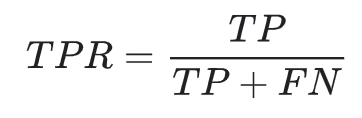

False Positive Rate (FPR) is defined as follows:

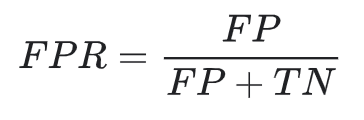

An ROC curve plots TPR vs. FPR at different classification thresholds.

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.</center>

####AUC: Area Under the ROC Curve -
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from 0 to 1.
AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the **probability that the model ranks a random positive example more highly than a random negative example**. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [ ]:
# plot ROC
y_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(y,  cnn_y_hat_prob)
plot_roc(y, y_pred)

**CONFUSION MATRIX**         
<img src = 'https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png'>

 a confusion matrix is a table that is used to evaluate the performance of a machine learning model on a set of test data. It has four main components: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

The confusion matrix can be used to calculate a number of metrics to evaluate the performance of the model, such as accuracy, precision, recall, and F1 score. Accuracy is the most common metric and is calculated by dividing the total number of correct predictions by the total number of predictions. Precision measures the proportion of positive predictions that were actually positive. Recall measures the proportion of actual positives that were correctly predicted as positive. F1 score is a harmonic mean of precision and recall.

The confusion matrix can also be used to visualize the performance of the model. For example, if the model is misclassifying a lot of instances as positive, then the false positive (FP) rate will be high. This means that the model is predicting positive for a lot of instances that are actually negative.

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y, y_pred), annot = True, cbar = False, fmt='.0f')
plt.show()

In [ ]:
!pip install --upgrade pillow
!pip install rasterio
cnn = build_model()



---

# **Solar Panel Detection in GeoTIFF Images**
---

### **Overview**

This Python script is designed for the detection and visualization of solar panels within a GeoTIFF image using a trained Convolutional Neural Network (CNN) model. It utilizes various Python libraries, including Pillow (PIL), NumPy, Matplotlib, rasterio, and Shapely, to perform the following tasks:

1. **Loading an Input Image**: The script loads a GeoTIFF image file from a specified path.

2. **Dividing the Image into Squares**: It divides the input image into smaller squares of a user-defined size and obtains predictions for each square using the trained CNN model.

3. **Getting the CRS (Coordinate Reference System)**: It extracts the Coordinate Reference System (CRS) information from the input GeoTIFF image. The CRS information is essential for geospatial referencing.

4. **Creating an Output Image**: The script creates an output image of the same size as the input image, which will be used to visualize the results.

5. **Drawing on the Output Image**: It iterates through the square IDs and their predictions. Based on a specified threshold, it determines whether a square represents a solar panel or not. If it's a solar panel, it draws a red rectangle around it; otherwise, it draws a dark blue rectangle.

6. **Saving the Output Image**: The script saves the output image as a GeoTIFF file, preserving the CRS data from the input image. It utilizes the `rasterio` library for this purpose.

7. **Displaying Comparison**: Finally, it displays a side-by-side comparison of the original input image and the output image with rectangles drawn around solar panels and non-solar panel areas.

### Usage

Before running the script, ensure that you have the required Python libraries installed in your environment. You can install missing libraries using pip:

```bash
pip install numpy matplotlib pillow rasterio shapely
```

Make sure to specify the following variables in the script:

- `tif_file_path`: The path to the input GeoTIFF image that you want to analyze.
- `square_size`: The size of the squares used for dividing the image. Adjust this value according to your requirements.
- `output_img_path`: The desired output file path for the annotated GeoTIFF image.

### Threshold

The threshold value (`0.4985`) used to determine whether a square represents a solar panel or not may need to be adjusted based on the specific characteristics of your CNN model and the nature of your data. You can modify this value as needed.

### Output

The script saves the annotated output GeoTIFF image to the specified path, allowing you to visually identify solar panels and non-solar panel areas within the image.

### Note

This code assumes that you have already trained the CNN model (`cnn`) to perform solar panel detection. Additionally, ensure that you have the necessary image files available and correctly set the file paths.

---


In [ ]:
cnn = build_model()

In [ ]:
threshold_fin=0.50875

IF YOUR INPUT IS TIFF IMG

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import rasterio
from rasterio.crs import CRS
from rasterio.transform import from_origin
import os
from rasterio.transform import from_origin
from shapely.geometry import box


tif_file_path = "/content/drive/MyDrive/2321.tif"

# Define the size of the squares (adjust as needed)
square_size = 101 # Change this to your desired square size in pixels

# Load the input image
img = Image.open(tif_file_path)



# Function to divide an image into squares
def divide_image_into_squares(image, square_size):
    # Convert the image to RGB if it's RGBA (4 layers)
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    img_width, img_height = image.size
    square_images = []
    square_ids = []

    for y in range(0, img_height, square_size):
        for x in range(0, img_width, square_size):
            # Crop a square from the image
            square = image.crop((x, y, x + square_size, y + square_size))
            square_images.append(np.array(square))
            square_ids.append(f"Square_{x}_{y}")

    # Preprocess all square images at once
    square_images = np.array(square_images) / 255.0

    # Predict all squares using the trained CNN model
    predictions = cnn.predict(square_images)

    return square_ids, predictions

# Divide the input image into squares and get their IDs and predictions
square_ids, predictions = divide_image_into_squares(img, square_size)

# Get the CRS (Coordinate Reference System) of the input TIFF image
with rasterio.open(tif_file_path) as src:
    crs = src.crs
    transform = src.transform

# Create the output image with the same CRS
output_img = Image.new('RGB', img.size)

# Create a drawing context on the output image
draw = ImageDraw.Draw(output_img)

# Define colors
red_color = (255,0,0)
dark_blue_color = (0, 0, 139)


# Extract solar panel IDs based on a threshold (adjust as needed)
solar_panel_ids = [square_id for square_id, prediction in zip(square_ids, predictions) if prediction>=threshold_fin]

# Iterate through squares with solar panels and draw rectangles in red
for square_id in solar_panel_ids:
    x, y = map(int, square_id.split("_")[1:])
    draw.rectangle([(x, y), (x + square_size, y + square_size)], outline=red_color, width=2, fill=red_color)

# Iterate through all squares and draw rectangles in dark blue
for square_id in square_ids:
    x, y = map(int, square_id.split("_")[1:])
    if square_id not in solar_panel_ids:
        draw.rectangle([(x, y), (x + square_size, y + square_size)], outline=dark_blue_color, width=2, fill=dark_blue_color)

# Convert the output image to a NumPy array
output_img_data = np.array(output_img)

# Save the output image with CRS data using rasterio
output_img_path = "/content/drive/MyDrive/output_image.tif"  # Provide the desired output file path on Google Drive
with rasterio.open(output_img_path, 'w', driver='GTiff', width=output_img.width, height=output_img.height, count=3, dtype=np.uint8, crs=crs, transform=transform) as dst:
    dst.write(output_img_data.transpose(2, 0, 1))  # Transpose the shape to (3, width, height)

# Display the original image and the output image side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(np.array(img))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(output_img_data)
axes[1].set_title('Output Image')
axes[1].axis('off')
plt.show()


**IF YOUR INPUT IS JPEG IMAGE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from shapely.geometry import box
import rasterio

jpeg_file_path = "/content/drive/MyDrive/abcd.jpg"

# Define the size of the squares (adjust as needed)
square_size = 101 # Change this to your desired square size in pixels

# Load the input image
img = Image.open(jpeg_file_path)

# Function to divide an image into squares
def divide_image_into_squares(image, square_size):
    # Convert the image to RGB if it's RGBA (4 layers)
    if image.mode == 'RGBA':
        image = image.convert('RGB')

    img_width, img_height = image.size
    square_images = []
    square_ids = []

    for y in range(0, img_height, square_size):
        for x in range(0, img_width, square_size):
            # Crop a square from the image
            square = image.crop((x, y, x + square_size, y + square_size))
            square_images.append(np.array(square))
            square_ids.append(f"Square_{x}_{y}")

    # Preprocess all square images at once
    square_images = np.array(square_images) / 255.0

    # Predict all squares using the trained CNN model (assuming cnn is defined elsewhere)
    predictions = cnn.predict(square_images)

    return square_ids, predictions

# Divide the input image into squares and get their IDs and predictions
square_ids, predictions = divide_image_into_squares(img, square_size)

# Get the CRS (Coordinate Reference System) of the input JPEG image
# Note: This section assumes that you have a corresponding .tif file with the same name and in the same directory as your .jpg file
tif_file_path = os.path.splitext(jpeg_file_path)[0] + ".tif"
with rasterio.open(tif_file_path) as src:
    crs = src.crs
    transform = src.transform

# Create the output image with the same size
output_img = Image.new('RGB', img.size)

# Create a drawing context on the output image
draw = ImageDraw.Draw(output_img)

# Define colors
red_color = (255,0,0)
dark_blue_color = (0, 0, 139)

# Extract solar panel IDs based on a threshold (adjust as needed)
threshold_fin = 0.5 # Adjust this threshold value as needed
solar_panel_ids = [square_id for square_id, prediction in zip(square_ids, predictions) if prediction >= threshold_fin]

# Iterate through squares with solar panels and draw rectangles in red
for square_id in solar_panel_ids:
    x, y = map(int, square_id.split("_")[1:])
    draw.rectangle([(x, y), (x + square_size, y + square_size)], outline=red_color, width=2, fill=red_color)

# Iterate through all squares and draw rectangles in dark blue
for square_id in square_ids:
    x, y = map(int, square_id.split("_")[1:])
    if square_id not in solar_panel_ids:
        draw.rectangle([(x, y), (x + square_size, y + square_size)], outline=dark_blue_color, width=2, fill=dark_blue_color)

# Convert the output image to a NumPy array
output_img_data = np.array(output_img)

# Save the output image with CRS data using rasterio
output_img_path = "/content/drive/MyDrive/output_image.tif"  # Provide the desired output file path on Google Drive
with rasterio.open(output_img_path, 'w', driver='GTiff', width=output_img.width, height=output_img.height, count=3, dtype=np.uint8, crs=crs, transform=transform) as dst:
    dst.write(output_img_data.transpose(2, 0, 1))  # Transpose the shape to (3, width, height)

# Display the original image and the output image side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(np.array(img))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(output_img_data)
axes[1].set_title('Output Image')
axes[1].axis('off')
plt.show()




**The model is able to make predictions on 40x40 squares even though it was trained on 101x101 images because of the concept of transfer learning.**

Here's why this works:

1. **Feature Hierarchies**: Convolutional Neural Networks (CNNs) are designed to learn hierarchical features. In the initial layers of the network, they learn simple features like edges and corners. As you move deeper into the network, they learn more complex features like shapes and textures. When you use a trained CNN on a smaller image, it can still detect these hierarchical features, even if the image is a downsized version.

2. **Local Patterns**: Your model, when trained on 101x101 images, learned to detect patterns and features within those images. When you apply it to a 40x40 square from a larger image, it's essentially looking for similar patterns in a local region. If a solar panel appears as a distinct pattern in the 40x40 square, your model might still recognize it based on the patterns it learned during training.

3. **Downsampling**: Pooling layers (e.g., MaxPooling) in CNNs help to downsample feature maps, which means that even in the later layers of your network, it's working with feature maps that have reduced spatial dimensions. This means that your model is already capable of handling smaller regions.

However, there are some caveats to keep in mind:

1. **Loss of Spatial Information**: When you apply your model to smaller squares, you lose some spatial context. For instance, if your model was trained to recognize the relative positions of solar panels in a 101x101 image, it might not perform as accurately when those panels are closer together in a 40x40 square.

2. **Scale Sensitivity**: Your model might not work as well on squares that are much smaller than the ones it was trained on. There's a limit to how much you can downscale before the model loses the ability to recognize patterns effectively.

3. **Localization Accuracy**: If precise localization of solar panels within the smaller squares is important, your model might not perform as well. It's detecting patterns but not necessarily determining their exact location.

In summary, while the model can make predictions on smaller squares due to the hierarchical and local nature of feature learning in CNNs, it might not perform as accurately as it would on the original scale of 101x101 images, especially if precise localization and spatial context are crucial for our task.



---

# ***Creating a Shapefile from TIFF Image with Identified Solar Panels***
---

### **Overview**

This Python script is designed to convert a GeoTIFF image containing identified solar panels into an Esri shapefile. It utilizes various Python libraries, including `geopandas`, `shapely`, and `rasterio`, to perform the following tasks:

1. **Opening and Reading the TIFF Image**: The script opens and reads the input GeoTIFF image containing identified solar panels using the `rasterio` library.

2. **Generating Polygon Shapes**: It generates polygon shapes from the rasterized image, where each polygon corresponds to a detected solar panel. The threshold value (`threshold`) determines whether a square in the image is considered a solar panel.

3. **Creating a GeoDataFrame**: The script creates a GeoDataFrame containing the polygon geometries extracted from the image. Valid polygons are filtered based on the threshold value.

4. **Assigning Coordinate Reference System (CRS)**: The GeoDataFrame is assigned the same Coordinate Reference System (CRS) as the input GeoTIFF image.

5. **Saving as Shapefile**: The resulting GeoDataFrame is saved as an Esri shapefile at the specified path.

### **Usage**

To use this script, you need to provide the following parameters:

- `tiff_path` (str): The path to the TIFF image with identified solar panels.
- `shapefile_path` (str): The desired path to save the resulting shapefile.
- `threshold` (float, optional): The threshold value for considering a square as a solar panel. The default value is `0.5`, but you can adjust it based on your specific needs.

### **Output**

Running this script will create a shapefile containing polygon geometries representing the identified solar panels. The shapefile can be further used for geospatial analysis and visualization.

### **Note**

- Ensure that you have the necessary Python libraries (`geopandas`, `shapely`, `rasterio`) installed in your environment. You can install them using pip:

  ```bash
  pip install geopandas shapely rasterio
  ```

- Replace the example file paths (`tiff_file_path` and `shapefile_output_path`) with the actual paths to your GeoTIFF image and the desired output shapefile path.

- Adjust the `threshold` value to fine-tune the identification of solar panels based on the characteristics of your data and the output from the previous step.

- The resulting shapefile can be loaded into GIS software for further analysis, visualization, or integration with other geospatial data.

---

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, shape
import rasterio
from rasterio.features import shapes

def create_shapefile_from_tiff(tiff_path, shapefile_path, threshold_fin):
    """
    Convert a TIFF image with identified solar panels into an Esri shapefile.

    Args:
        tiff_path (str): Path to the TIFF image with identified solar panels.
        shapefile_path (str): Path to save the resulting shapefile.
        threshold (float): Threshold value for considering a square as a solar panel (0.5 by default).
    """
    try:
        # Open the TIFF image and read it with rasterio
        with rasterio.open(tiff_path) as src:
            # Read the image data
            img_data = src.read(1)
            # Generate the shapes (polygons) from the rasterized image
            shapes_gen = shapes(img_data, mask=None, transform=src.transform)

            # Create an empty list to store the polygon geometries
            polygons = []

            # Iterate through the shapes and filter based on the threshold
            for shape_obj, val in shapes_gen:
                if val >= threshold:
                    # Check if the shape is a valid polygon
                    if shape_obj['type'] == 'Polygon' and len(shape_obj['coordinates']) >= 3:
                        polygons.append(shape(shape_obj))

            # Create a GeoDataFrame with the extracted polygons and assign CRS
            gdf = gpd.GeoDataFrame(geometry=polygons, crs=src.crs)

            # Save the GeoDataFrame as a shapefile
            gdf.to_file(shapefile_path)

        print(f"Shapefile saved successfully: {shapefile_path}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage:
tiff_file_path = "/content/drive/MyDrive/output_image.tif"
shapefile_output_path = "/content/drive/MyDrive/shape/solar_panels.shp"

create_shapefile_from_tiff(tiff_file_path, shapefile_output_path)


Certainly! Let's go into more detail and provide examples for each of these terms:

1. **ReLU (Rectified Linear Unit)**:
   - ReLU is an activation function widely used in deep learning. It introduces non-linearity to the model, which helps it learn complex patterns. The function is defined as f(x) = max(0, x). This means that if the input x is positive, the output is x, and if x is negative, the output is 0.
   - Example:
     ```
     f(x) = max(0, -2) = 0
     f(x) = max(0, 3) = 3
     ```

2. **Normalization**:
   - Normalization is the process of scaling input features so that they have a mean of 0 and a standard deviation of 1. This helps in speeding up the training process and can lead to better convergence.
   - Example:
     ```
     Original data: [2, 4, 6, 8, 10]
     Normalized data: [-1.414, -0.707, 0, 0.707, 1.414] (mean=0, std=1)
     ```

3. **Pooling**:
   - Pooling reduces the spatial dimensions (width and height) of a feature map while retaining important information. The most common pooling operation is max-pooling, which takes the maximum value from a group of pixels.
   - Example:
     ```
     Original feature map:
     [[1, 2, 3],
      [4, 5, 6],
      [7, 8, 9]]
     
     Max-pooling with 2x2 window and stride 2:
     [[5]]
     ```

4. **Batch Processing**:
   - In batch processing, a fixed number of samples (batch size) are processed together before updating the model's parameters. This improves computational efficiency and allows for parallelization.
   - Example: If you have 1000 training samples and a batch size of 32, you'll have 32 batches, each containing 32 samples.

5. **Batch Size**:
   - The batch size is the number of samples that are processed in one forward and backward pass. It affects memory usage and the speed of training. A larger batch size may lead to faster training, but it requires more memory.
   - Example: A batch size of 64 means the model processes 64 samples at a time during training.

6. **Activation Function**:
   - Activation functions introduce non-linearity into a neural network, allowing it to model complex relationships. Besides ReLU, other functions like Sigmoid, Tanh, and Softmax are used for specific purposes.
   - Example:
     - Sigmoid: f(x) = 1 / (1 + e^(-x))

7. **Transfer Learning**:
   - Transfer learning involves using a pre-trained model on a new, related task. The knowledge gained from the original task is transferred to the new task, often saving a significant amount of time and data.
   - Example: Using a pre-trained ImageNet model for a specific object recognition task.

8. **Optimizer**:
   - Optimizers adjust the model's parameters to minimize the loss function. Examples include Stochastic Gradient Descent (SGD), Adam, RMSprop, etc. Each has different algorithms for updating weights.
   - Example: SGD with momentum - a variation of SGD that helps to speed up convergence.

9. **Learning Rate**:
   - The learning rate controls the step size in which the optimizer updates the model's parameters. A too high learning rate might overshoot the minimum, while a too low rate may lead to slow convergence.
   - Example: Learning rate = 0.001

10. **Using Different Architecture**:
    - Modifying the architecture involves changing the structure of a neural network. For instance, adding more layers, changing the types of layers (e.g., adding convolutional layers to a feedforward network), or changing the number of neurons in each layer.
    - Example: Transitioning from a simple feedforward neural network to a more complex Convolutional Neural Network (CNN) for image recognition tasks.

I hope these examples provide a clearer understanding! If you have any more questions, feel free to ask.